In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [ ]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [ ]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')  # TODO: Load CSV with correct separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]  # TODO: Select features

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [ ]:
import numpy as np

class KMeansClustering:
    """Minimal K-means implementation."""

    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Randomly select n_clusters distinct points from X as initial centroids."""
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid."""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster."""
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                # Handle empty cluster by keeping the old centroid
                new_centroids.append(self.centroids[i])
        return np.array(new_centroids)

    def fit(self, X):
        """Run K-means until convergence or max_iters."""
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break

            self.centroids = new_centroids
            self.labels = labels

        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids."""
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

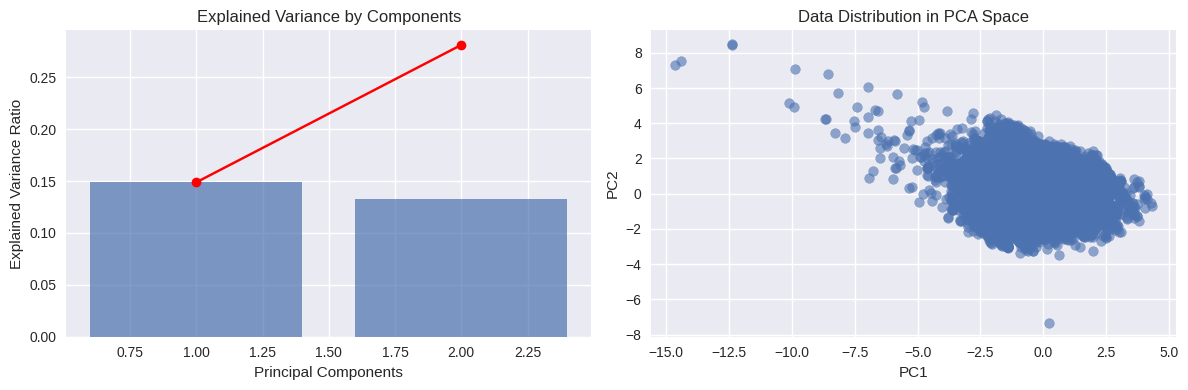

Shape after PCA: (45211, 2)


In [ ]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7)
    plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')
    plt.title('Explained Variance by Components')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')

    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
    plt.title('Data Distribution in PCA Space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

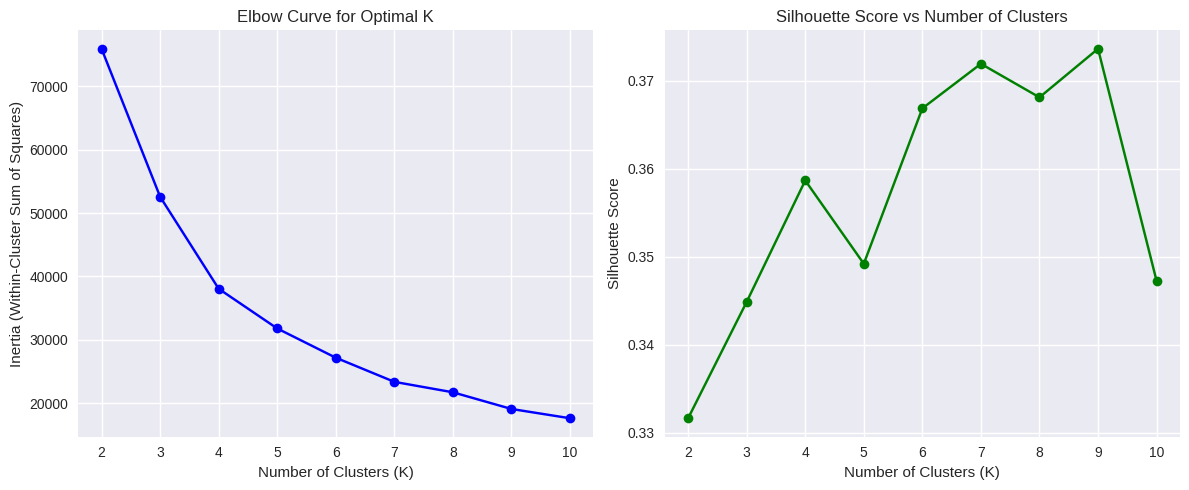

/tmp/ipython-input-3047679931.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([silhouette_values[kmeans.labels == i] for i in range(kmeans.n_clusters)],


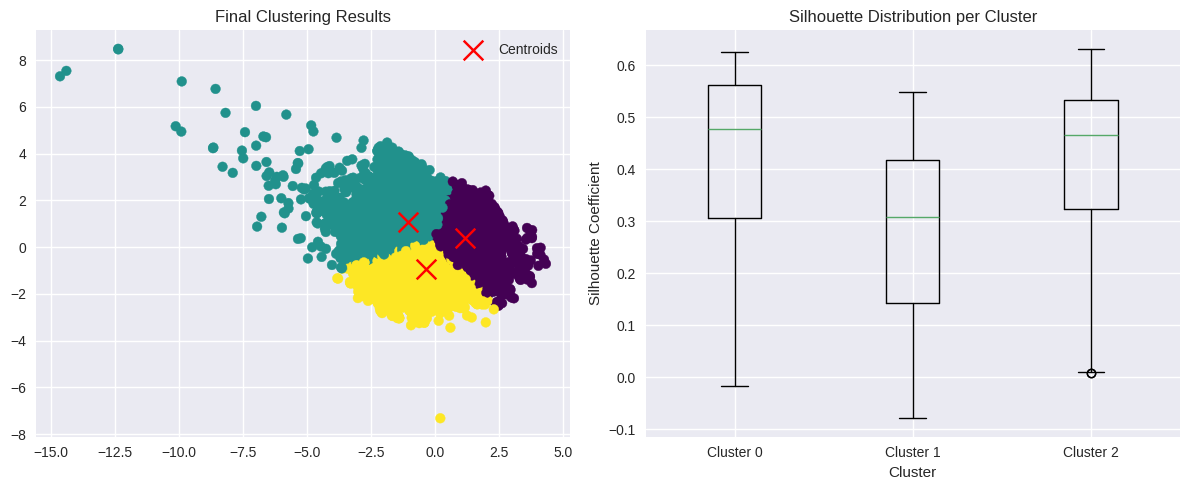


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [7]:
from sklearn.metrics import silhouette_score

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for i, c in enumerate(centroids):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - c) ** 2)
    return inertia

def plot_elbow_and_silhouette(X, max_k=10):
    """Plot both the Elbow Curve and Silhouette Score to find optimal K."""
    inertias = []
    silhouettes = []
    K = range(2, max_k + 1)  # silhouette undefined for k=1

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, kmeans.labels_))

    # Create plots side by side
    plt.figure(figsize=(12, 5))

    # Elbow Curve
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-')
    plt.title('Elbow Curve for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.grid(True)

    # Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, 'go-')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouettes


# Try different numbers of clusters
inertias, silhouettes = plot_elbow_and_silhouette(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on the curves
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 5))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot silhouette distribution per cluster (boxplot)
plt.subplot(1, 2, 2)
silhouette_values = silhouette_samples(X_pca, kmeans.labels)
plt.boxplot([silhouette_values[kmeans.labels == i] for i in range(kmeans.n_clusters)],
            labels=[f'Cluster {i}' for i in range(kmeans.n_clusters)])
plt.title('Silhouette Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Coefficient')

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [8]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Bisecting (Recursive) K-Means implementation."""

    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached."""
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)  # start with all in cluster 0
        current_k = 1  # start with 1 cluster
        next_label = 1  # label for new clusters

        # Continue splitting until desired number of clusters is reached
        while current_k < self.n_clusters:
            # Find the largest cluster by number of points
            unique_labels, counts = np.unique(labels, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]
            cluster_mask = labels == cluster_to_split
            cluster_points = X[cluster_mask]

            # Run binary KMeans (k=2) on that cluster
            km = KMeans(n_clusters=2, random_state=self.random_state)
            sub_labels = km.fit_predict(cluster_points)

            # 3️⃣ Update labels — keep one as original, assign new label to the other
            sub_unique = np.unique(sub_labels)
            labels[cluster_mask] = np.where(sub_labels == sub_unique[0],
                                            cluster_to_split, next_label)

            # 4️⃣ Record split info and centroids
            self.split_tree[cluster_to_split] = (cluster_to_split, next_label)
            self.centers_[cluster_to_split] = km.cluster_centers_[0]
            self.centers_[next_label] = km.cluster_centers_[1]

            # 5️⃣ Update counts
            current_k += 1
            next_label += 1

        self.labels_ = labels
        return labels


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

In [10]:
#1

import numpy as np

def kmeans_plus_plus_init(X, n_clusters, random_state=42):
    """Implement K-Means++ initialization to select initial centroids."""
    np.random.seed(random_state)
    n_samples = X.shape[0]

    # Step 1: Randomly pick the first centroid
    centroids = [X[np.random.randint(0, n_samples)]]

    # Step 2: Select remaining centroids
    for _ in range(1, n_clusters):
        # Compute squared distances from the nearest existing centroid
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1) ** 2
        probs = distances / distances.sum()
        next_centroid = X[np.random.choice(n_samples, p=probs)]
        centroids.append(next_centroid)

    return np.array(centroids)

# Example usage:
initial_centroids = kmeans_plus_plus_init(X_pca, n_clusters=3)
print("Initial Centroids (K-Means++):\n", initial_centroids)


Initial Centroids (K-Means++):
 [[ 1.61337392  0.88023161]
 [-0.93130642  1.35594164]
 [ 1.27007567 -1.5986355 ]]


Cluster Summary (Mean Feature Values):
               age      balance  campaign  previous       job  education  \
Cluster                                                                    
0        39.375316   691.043605  2.662773  0.554409  1.725715   0.755694   
1        52.785220  2937.094298  2.810360  0.469595  4.522911   1.108718   
2        35.699932  1037.442131  2.819253  0.661665  6.331274   1.663742   

          housing      loan   default  
Cluster                                
0        0.835118  0.290572  0.037895  
1        0.131107  0.065648  0.000000  
2        0.564827  0.107690  0.011994  


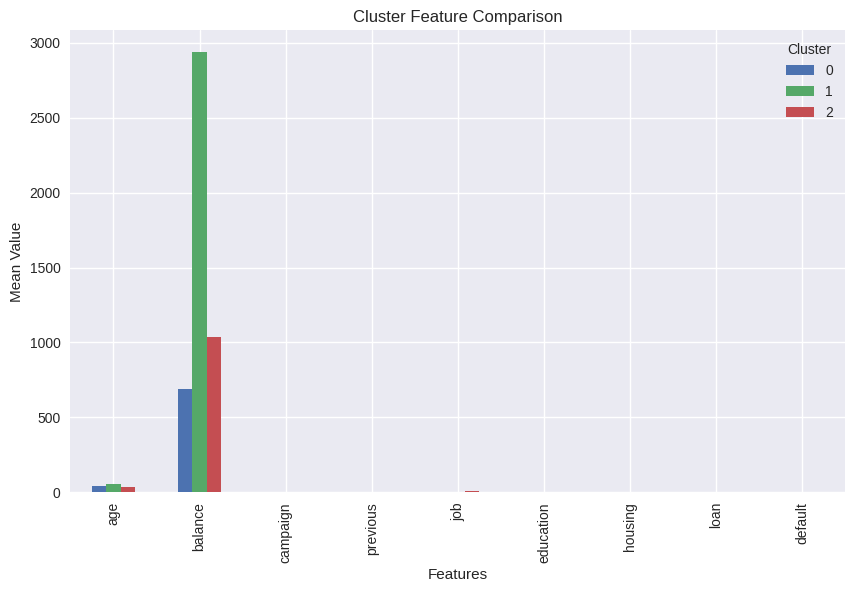

In [11]:
#2

import pandas as pd
import matplotlib.pyplot as plt

def interpret_clusters(original_df, labels, feature_cols):
    """Analyze and visualize cluster characteristics."""
    df = original_df.copy()
    df['Cluster'] = labels

    # Compute mean feature values per cluster
    cluster_summary = df.groupby('Cluster')[feature_cols].mean()
    print("Cluster Summary (Mean Feature Values):")
    print(cluster_summary)

    # Plot cluster means
    cluster_summary.T.plot(kind='bar', figsize=(10, 6))
    plt.title('Cluster Feature Comparison')
    plt.xlabel('Features')
    plt.ylabel('Mean Value')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Example usage:
feature_cols = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 'housing', 'loan', 'default']
interpret_clusters(data, kmeans.labels, feature_cols)


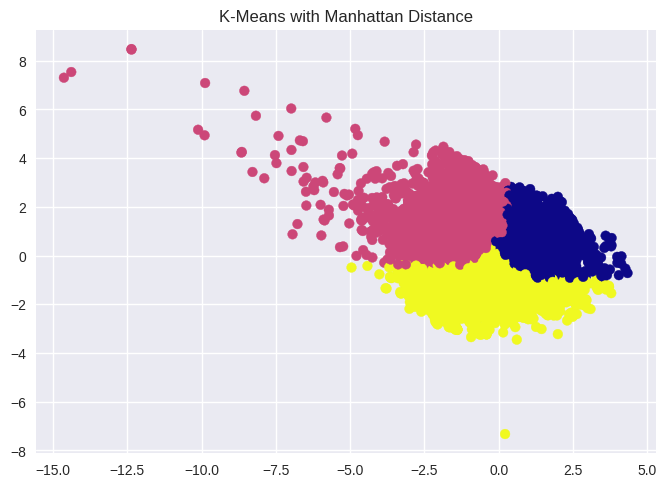

In [12]:
#3

def manhattan_distance(a, b):
    """Compute Manhattan (L1) distance between points a and b."""
    return np.sum(np.abs(a - b), axis=1)

class KMeansManhattan(KMeansClustering):
    """Custom KMeans using Manhattan distance instead of Euclidean."""

    def _assign_clusters(self, X):
        distances = np.array([[np.sum(np.abs(x - c)) for c in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

# Example usage:
kmeans_manhattan = KMeansManhattan(n_clusters=3)
kmeans_manhattan.fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_manhattan.labels, cmap='plasma')
plt.title('K-Means with Manhattan Distance')
plt.show()

Detected 894 outliers (threshold=2.5)


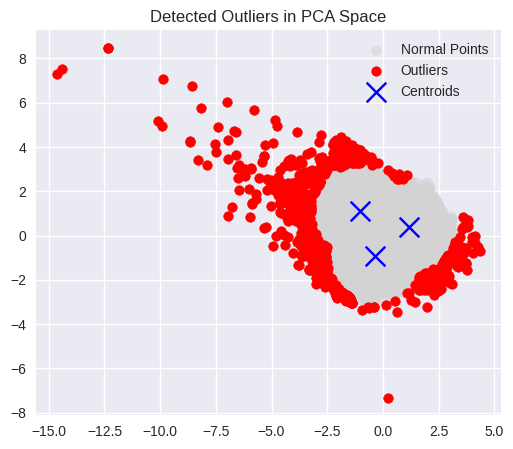

In [13]:
#4

def detect_outliers(X, labels, centroids, threshold=2.5):
    """Detect points that are far from their assigned centroid."""
    distances = np.linalg.norm(X - centroids[labels], axis=1)
    mean_dist = np.mean(distances)
    std_dist = np.std(distances)

    # Points farther than (mean + threshold*std) are outliers
    outlier_mask = distances > mean_dist + threshold * std_dist
    outliers = np.where(outlier_mask)[0]

    print(f"Detected {len(outliers)} outliers (threshold={threshold})")

    # Visualization
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c='lightgray', alpha=0.5, label='Normal Points')
    plt.scatter(X[outliers, 0], X[outliers, 1], c='red', label='Outliers')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='x', s=200, label='Centroids')
    plt.title('Detected Outliers in PCA Space')
    plt.legend()
    plt.show()

    return outliers

# Example usage:
outliers = detect_outliers(X_pca, kmeans.labels, kmeans.centroids)
